In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/restaurant-level-1/Dataset  (2).csv


## 1.Importing Necessary Libraries and Loading the Dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("/kaggle/input/restaurant-level-1/Dataset  (2).csv")


## Level1 Task1: Top Cuisines 
## 1.1: Determine the top three most common cuisines in the dataset. 

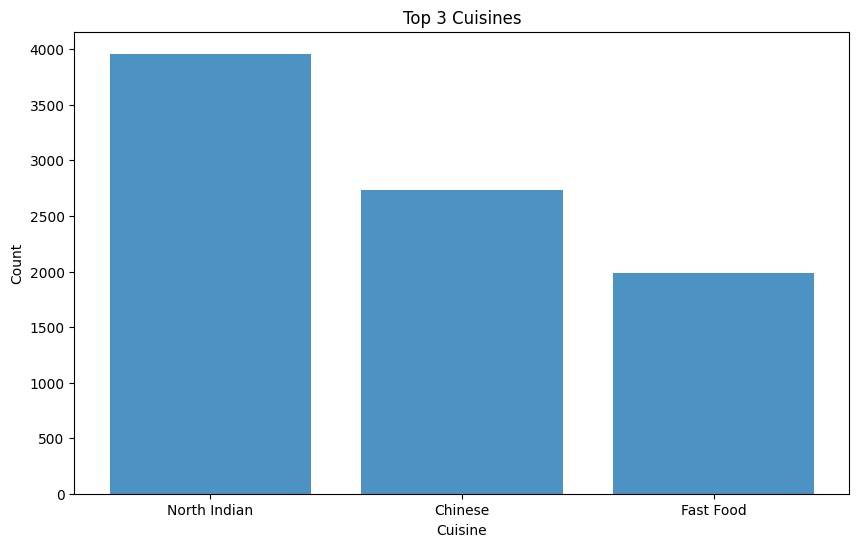

In [3]:
import matplotlib.pyplot as plt

# Calculate the top 3 cuisines
top_cuisines = data['Cuisines'].str.split(', ', expand=True).stack().value_counts().head(3)

# Plot the top 3 cuisines as a bar plot
plt.figure(figsize=(10,6))
plt.bar(top_cuisines.index, top_cuisines.values, alpha=0.8)
plt.title('Top 3 Cuisines')
plt.xlabel('Cuisine')
plt.ylabel('Count')
plt.show()

## 1.2 Calculate the percentage of restaurants that serve each of the top cuisines.

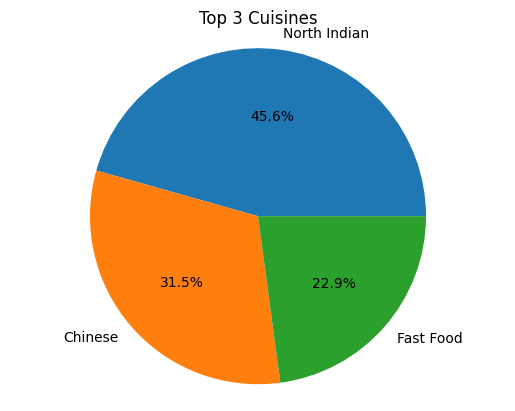

In [4]:
import matplotlib.pyplot as plt

# Calculate the top 3 cuisines
top_cuisines = data['Cuisines'].str.split(', ', expand=True).stack().value_counts().head(3)

# Calculate the percentage of each cuisine
percentage = (top_cuisines / len(data)) * 100

# Create a pie chart
plt.pie(top_cuisines.values, labels=top_cuisines.index, autopct=lambda p: f"{p:.1f}%")
plt.axis('equal')
plt.title('Top 3 Cuisines')
plt.show()

## Task2: City Analysis
## 2.1: Identify the city with the highest number of restaurants in the dataset.

In [5]:
from termcolor import colored

city_restaurant_counts = data.groupby('City')['Restaurant ID'].nunique()
city_with_most_restaurants = city_restaurant_counts.idxmax()

print(colored(f"City with the most restaurants: {city_with_most_restaurants}", 'green', 'on_yellow'))





City with the most restaurants: New Delhi
